# Local Testing

In [1]:
from executorlib import Executor

In [2]:
%%time
with Executor(backend="local") as exe:
    future = exe.submit(sum, [1, 1])
    print(future.result())

2
CPU times: user 28.8 ms, sys: 14.3 ms, total: 43.2 ms
Wall time: 709 ms


In [3]:
%%time
with Executor(backend="local") as exe:
    future_lst = [exe.submit(sum, [i, i]) for i in range(2,5)]
    print([f.result() for f in future_lst])

[4, 6, 8]
CPU times: user 9.98 ms, sys: 5.93 ms, total: 15.9 ms
Wall time: 471 ms


In [4]:
%%time
with Executor(backend="local") as exe:
    results = exe.map(sum, [[5, 5], [6, 6], [7, 7]])
    print(list(results))

[10, 12, 14]
CPU times: user 13.6 ms, sys: 1.71 ms, total: 15.3 ms
Wall time: 471 ms


## Parallel functions 

### MPI parallel functions

In [5]:
from executorlib import Executor

In [6]:
def calc(i):
    from mpi4py import MPI

    size = MPI.COMM_WORLD.Get_size()
    rank = MPI.COMM_WORLD.Get_rank()
    return i, size, rank

In [7]:
with Executor(max_workers=1, max_cores=2, backend="local") as exe:
    fs = exe.submit(calc, 3, resource_dict={"cores": 2})
    print(fs.result())

[(3, 2, 0), (3, 2, 1)]


--------------------------------------------------------------------------
btl_vader_single_copy_mechanism MCA variable, but CMA support is
not available due to restrictive ptrace settings.

The vader shared memory BTL will fall back on another single-copy
mechanism if one is available. This may result in lower performance.

  Local host: cmpc06
--------------------------------------------------------------------------
[cmpc06:12990] 1 more process has sent help message help-btl-vader.txt / cma-permission-denied
[cmpc06:12990] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages


In [8]:
with Executor(max_workers=1, max_cores=2, resource_dict={"cores": 2}, backend="local") as exe:
    fs = exe.submit(calc, 3,)
    print(fs.result())

[(3, 2, 0), (3, 2, 1)]


--------------------------------------------------------------------------
btl_vader_single_copy_mechanism MCA variable, but CMA support is
not available due to restrictive ptrace settings.

The vader shared memory BTL will fall back on another single-copy
mechanism if one is available. This may result in lower performance.

  Local host: cmpc06
--------------------------------------------------------------------------
[cmpc06:13024] 1 more process has sent help message help-btl-vader.txt / cma-permission-denied
[cmpc06:13024] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages


### Thread parallelism

### Combined parallelism

## Performance Optimization

### Block Allocation

In [9]:
from executorlib import Executor

In [10]:
%%time
with Executor(backend="local", block_allocation=True) as exe:
    future = exe.submit(sum, [1, 1])
    print(future.result())

2
CPU times: user 14.2 ms, sys: 4.5 ms, total: 18.7 ms
Wall time: 684 ms


In [11]:
%%time
with Executor(backend="local", block_allocation=True) as exe:
    future_lst = [exe.submit(sum, [i, i]) for i in range(2,5)]
    print([f.result() for f in future_lst])

[4, 6, 8]
CPU times: user 12.5 ms, sys: 7.49 ms, total: 19.9 ms
Wall time: 689 ms


In [12]:
%%time
with Executor(backend="local", block_allocation=True) as exe:
    results = exe.map(sum, [[5, 5], [6, 6], [7, 7]])
    print(list(results))

[10, 12, 14]
CPU times: user 13.2 ms, sys: 6.64 ms, total: 19.8 ms
Wall time: 695 ms


In [13]:
def calc(i):
    from mpi4py import MPI

    size = MPI.COMM_WORLD.Get_size()
    rank = MPI.COMM_WORLD.Get_rank()
    return i, size, rank

In [14]:
with Executor(max_workers=1, max_cores=2, resource_dict={"cores": 2}, backend="local", block_allocation=True) as exe:
    fs = exe.submit(calc, 3,)
    print(fs.result())

[(3, 2, 0), (3, 2, 1)]


--------------------------------------------------------------------------
btl_vader_single_copy_mechanism MCA variable, but CMA support is
not available due to restrictive ptrace settings.

The vader shared memory BTL will fall back on another single-copy
mechanism if one is available. This may result in lower performance.

  Local host: cmpc06
--------------------------------------------------------------------------
[cmpc06:13322] 1 more process has sent help message help-btl-vader.txt / cma-permission-denied
[cmpc06:13322] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages


In [15]:
def calc(i, j, k):
    return i + j + k

In [16]:
def init_function():
    return {"j": 4, "k": 3, "l": 2}

In [17]:
with Executor(init_function=init_function, backend="local", block_allocation=True) as exe:
    fs = exe.submit(calc, 2, j=5)
    print(fs.result())

10


### Cache 

In [18]:
from executorlib import Executor

In [19]:
%%time
with Executor(backend="local", cache_directory="./cache") as exe:
    future_lst = [exe.submit(sum, [i, i]) for i in range(1,4)]
    print([f.result() for f in future_lst])

[2, 4, 6]
CPU times: user 89.7 ms, sys: 47 ms, total: 137 ms
Wall time: 1.62 s


In [20]:
%%time
with Executor(backend="local", cache_directory="./cache") as exe:
    future_lst = [exe.submit(sum, [i, i]) for i in range(1,4)]
    print([f.result() for f in future_lst])

[2, 4, 6]
CPU times: user 18.6 ms, sys: 5.68 ms, total: 24.3 ms
Wall time: 528 ms


In [21]:
import os
import shutil 

cache_dir = "./cache"
if os.path.exists(cache_dir):
    print(os.listdir(cache_dir))
    try:
        shutil.rmtree(cache_dir)
    except OSError:
        pass

['sumb6a5053f96b7031239c2e8d0e7563ce4.h5out', 'sumd1bf4ee658f1ac42924a2e4690e797f4.h5out', 'sum5171356dfe527405c606081cfbd2dffe.h5out']


### Dependencies

In [22]:
from executorlib import Executor

In [23]:
def add_funct(a, b):
    return a + b

In [24]:
with Executor(backend="local") as exe:
    future = None
    for i in range(1,4):
        if future is None:
            future = exe.submit(add_funct, i, i)
        else: 
            future = exe.submit(add_funct, i, future)
    print(future.result())

7


None


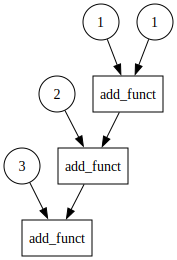

In [25]:
with Executor(backend="local", plot_dependency_graph=True) as exe:
    future = None
    for i in range(1,4):
        if future is None:
            future = exe.submit(add_funct, i, i)
        else: 
            future = exe.submit(add_funct, i, future)
    print(future.result())